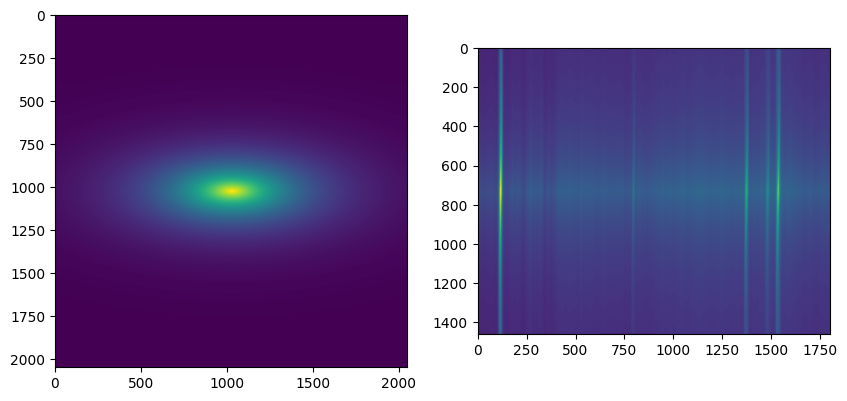

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

import astropy.io.fits as pyfits
from astropy.wcs import WCS
import astropy.units as u
u.imperial.enable()

from scipy.optimize import curve_fit

galaxSpect = 'Galax_Spect.fits'
hdu = pyfits.open(galaxSpect)
IMG = hdu[1].data
LSS = hdu[2].data
headerIMG= hdu[1].header
headerLSS = hdu[2].header

fig, axes = plt.subplots(1, 2, figsize=(10, 10))
axes[0].imshow(IMG)
axes[1].imshow(LSS)

plt.show()


In [120]:
headerIMG

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                   32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2048                                                  
NAXIS2  =                 2048                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
WCSAXESD=                    2                                                  
CRPIX1D =              1024.5                                                   
CRPIX2D =              1024.5                                                   
CDELT1D =               0.018                                                   
CDELT2D =               0.018                                                   
CUNIT1D = 'mm      '        

In [121]:
headerLSS

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                   32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1800                                                  
NAXIS2  =                 1463                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
WCSAXES =                    1 / Number of coordinate axes                      
CRPIX1  =                  1.0 / Pixel coordinate of reference point            
CRPIX2  =                  1.0 / Pixel coordinate of reference point            
CDELT1  =  1.1745426707708E-10 / [m] Coordinate increment at reference point    
CDELT2  =            0.0013675 / [arcsec] Coordinate increment at reference poin
CUNIT1  = 'm'               

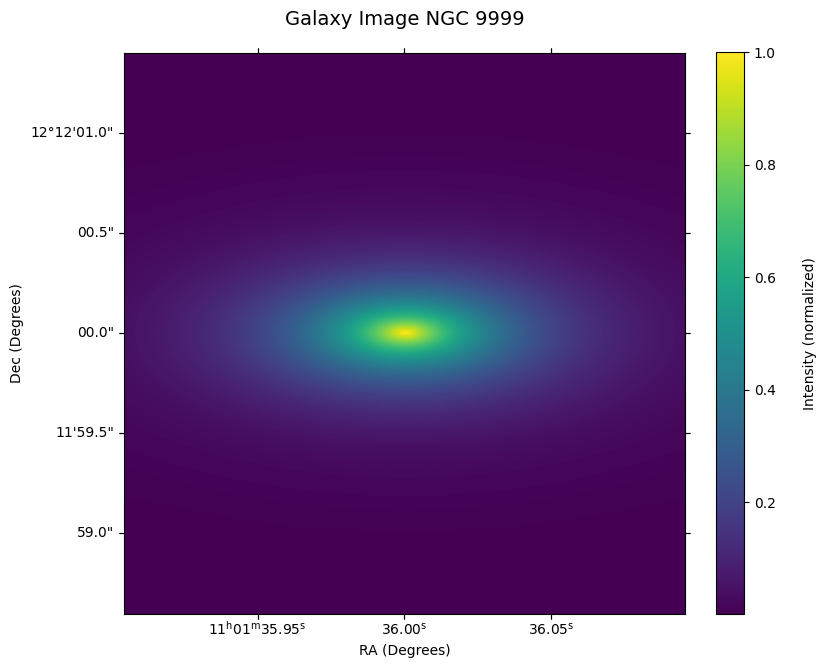

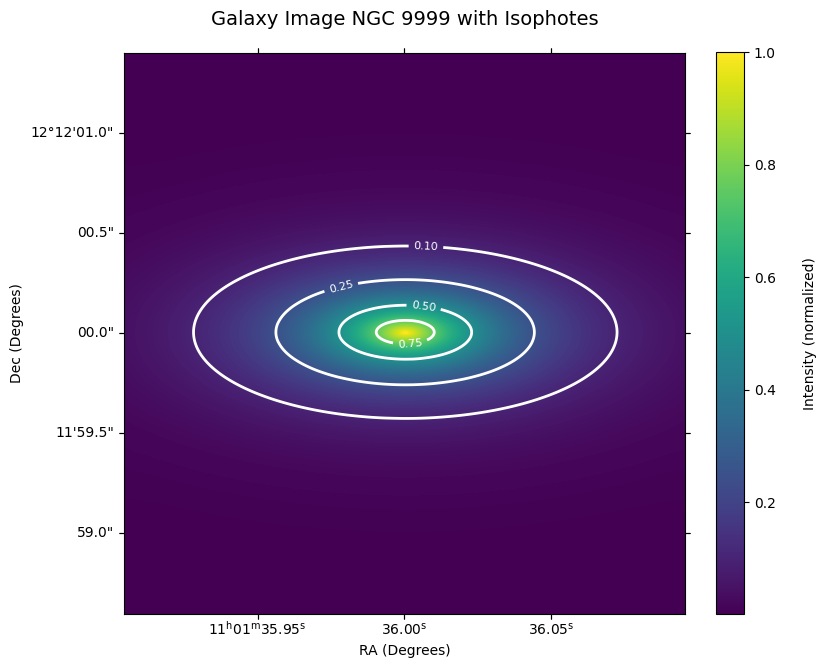

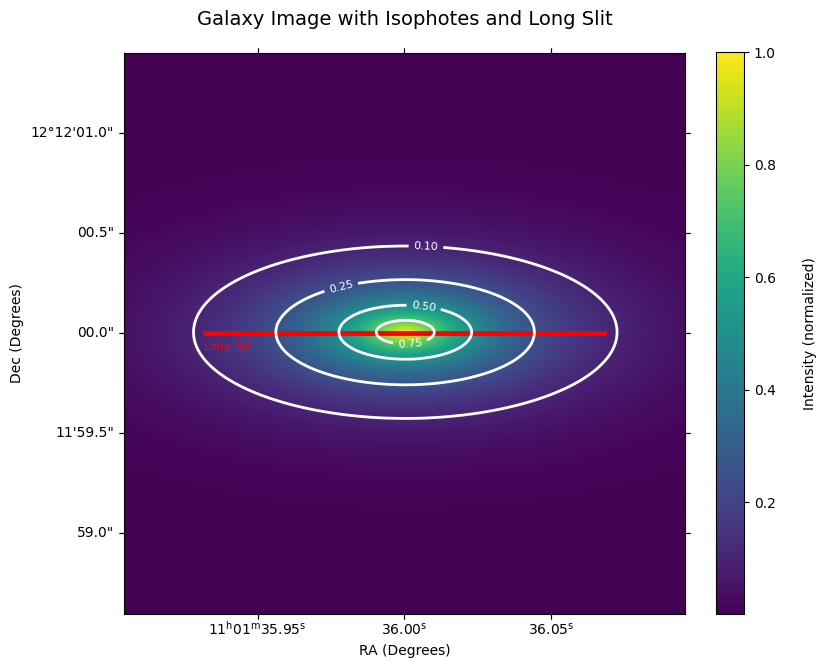

In [122]:
# normalizing IMG data for plots
IMG_normalized = IMG / np.max(IMG)

# set WCS object from IMG header
wcsIMG = WCS(headerIMG)

# show galaxy image in WCS (normal)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection=wcsIMG)

caxIMG = ax.imshow(IMG_normalized, cmap='viridis', origin='lower', interpolation='nearest')

cbarIMG = plt.colorbar(caxIMG, ax=ax, label='Intensity (normalized)', fraction=0.0453)

cbarIMG.set_label('Intensity (normalized)', labelpad=20)

ax.set_xlabel('RA (Degrees)')
ax.set_ylabel('Dec (Degrees)')

ax.set_title('Galaxy Image NGC 9999', fontsize=14, pad=20)

plt.show()

# show galaxy image in WCS (Isophotes)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection=wcsIMG)

caxIMG = ax.imshow(IMG_normalized, cmap='viridis', origin='lower', interpolation='nearest')

cbarIMG = plt.colorbar(caxIMG, ax=ax, label='Intensity (normalized)', fraction=0.0453)

cbarIMG.set_label('Intensity (normalized)', labelpad=20)

levelsIMG = [0.1, 0.25, 0.5, 0.75]
contoursIMG = ax.contour(IMG_normalized, levels=levelsIMG, colors='white', linewidths=2)

ax.clabel(contoursIMG, inline=True, fontsize=8)

ax.set_xlabel('RA (Degrees)')
ax.set_ylabel('Dec (Degrees)')

ax.set_title('Galaxy Image NGC 9999 with Isophotes', fontsize=14, pad=20)

plt.show()

# show galaxy image in WCS (Isophotes with slit)
slit_x_center = headerIMG["CRPIX1"] 
slit_y_center = headerIMG["CRPIX1"]

SLITLEN = headerLSS["SLITLEN"] / 3600
SLITWID = headerLSS["SLITWID"] / 3600

slit_length_pixels = SLITLEN / wcsIMG.wcs.cdelt[0]
slit_width_pixels = SLITWID / wcsIMG.wcs.cdelt[1] 

slit_x_Start = slit_x_center - slit_length_pixels / 2
slit_y_Start = slit_y_center - slit_width_pixels / 2

slit_rect = Rectangle((slit_x_Start, slit_y_Start), slit_length_pixels, slit_width_pixels, 
                      edgecolor='red', facecolor='none', lw=2, label='Long Slit')

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection=wcsIMG)

caxIMG = ax.imshow(IMG_normalized, cmap='viridis', origin='lower', interpolation='nearest')

cbarIMG = plt.colorbar(caxIMG, ax=ax, label='Intensity (normalized)', fraction=0.0453)

cbarIMG.set_label('Intensity (normalized)', labelpad=20)

levelsIMG = [0.1, 0.25, 0.5, 0.75]
contoursIMG = ax.contour(IMG_normalized, levels=levelsIMG, colors='white', linewidths=2)

ax.clabel(contoursIMG, inline=True, fontsize=8)

ax.add_patch(slit_rect)

label = 'Long Slit'
ax.text(
    slit_x_Start + slit_width_pixels * 12, 
    slit_y_Start - slit_width_pixels * 4,  
    label, 
    color='red',
    fontsize=8,
    ha='center',
    va='top'
)

ax.set_xlabel('RA (Degrees)')
ax.set_ylabel('Dec (Degrees)')

ax.set_title('Galaxy Image with Isophotes and Long Slit', fontsize=14, pad=20)

plt.show()

In [123]:
# define physical absolute axis
xIMG = headerIMG["CRVAL1"] + (np.arange(headerIMG["NAXIS1"]) - (headerIMG["CRPIX1"] - 1)) * headerIMG["CDELT1"]
yIMG = headerIMG["CRVAL2"] + (np.arange(headerIMG["NAXIS2"]) - (headerIMG["CRPIX2"] - 1)) * headerIMG["CDELT2"]

x_DEG_IMG = xIMG * u.deg
y_DEG_IMG = yIMG * u.deg

xLSS = headerLSS["CRVAL1"] + (np.arange(headerLSS["NAXIS1"]) - (headerLSS["CRPIX1"] - 1)) * headerLSS["CDELT1"]
yLSS = headerLSS["CRVAL2"] + (np.arange(headerLSS["NAXIS2"]) - (headerLSS["CRPIX2"] - 1)) * headerLSS["CDELT2"]

x_M_LSS = xLSS * u.m
y_ARCSEC_LSS = yLSS * u.arcsec

# define physical relative IMAGE axis with proper units
xIMGStart = headerIMG["CRVAL1"] * u.deg
yIMGStart = headerIMG["CRVAL2"] * u.deg

x_DEG_IMG_rel = x_DEG_IMG - xIMGStart
y_DEG_IMG_rel = y_DEG_IMG - yIMGStart

x_ARCSEC_IMG_rel = x_DEG_IMG_rel.to(u.arcsec)
y_ARCSEC_IMG_rel = y_DEG_IMG_rel.to(u.arcsec)

# define physical (relative) LSS axis with proper units
x_NM_LSS = x_M_LSS.to(u.nm)

yLSSStart = headerLSS["CRVAL2"] * u.arcsec

y_ARCSEC_LSS_rel = y_ARCSEC_LSS - yLSSStart
y_DEG_LSS = y_ARCSEC_LSS.to(u.deg)

Hubble constant H0 = 67.74 km / (Mpc s)
speed of light c = 299792.458 km / s
velocity at z = 0.3 is 76898.43718215614 km / s
distance d = 1135.1998403034565 Mpc



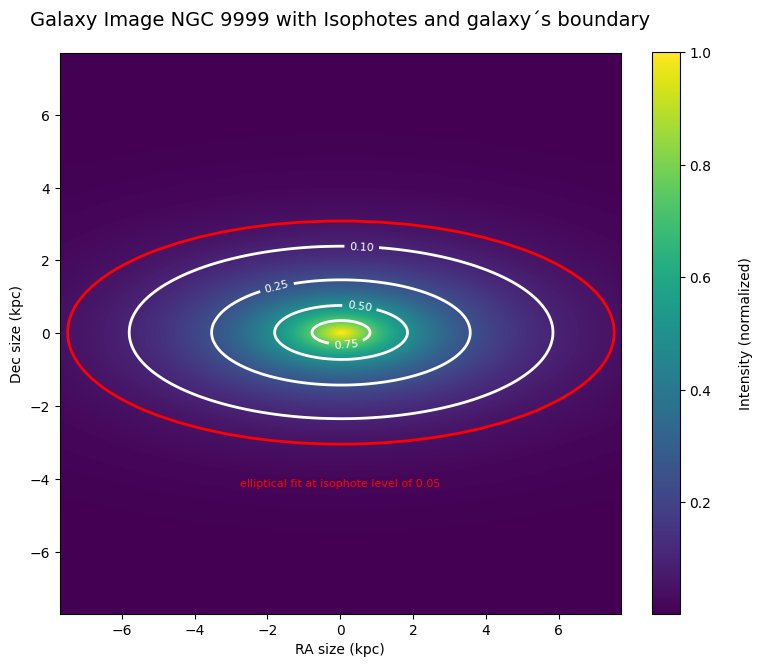

In [124]:
from astropy.cosmology import Planck15
from astropy.constants import c
from scipy.ndimage import label
from skimage.measure import regionprops
from matplotlib.patches import Ellipse

# convert the angular scale of the image to a physical size
# get physical constants and calculate distance d
H0 = Planck15.H0
c = c.to('km/s')
z = 0.3

v = c * ((1 + z)**2 - 1)/((1 + z)**2 + 1)

d = v / H0

print(f"Hubble constant H0 = {H0}")
print(f"speed of light c = {c}")
print(f"velocity at z = {z} is {v}")
print(f"distance d = {d}")
print()

# convert arcsec to kpc
x_kpc_IMG_rel = x_ARCSEC_IMG_rel.value * d.value * 1000 * np.pi / (180 * 3600)
y_kpc_IMG_rel = y_ARCSEC_IMG_rel.value * d.value * 1000 * np.pi / (180 * 3600)

# calculate major and minor axis via ellipse fit
from scipy.ndimage import label
from skimage.measure import regionprops
from matplotlib.patches import Ellipse

threshold = 0.05
IMG_digital = IMG_normalized > threshold

# Labeling the Galaxy (Identify connected regions)
labeled_IMG, num_features = label(IMG_digital)

# Extract Region Properties (Find the bounding ellipse)
props = regionprops(labeled_IMG, intensity_image=IMG_normalized)

# Assume the largest region corresponds to the galaxy
galaxy_region = max(props, key=lambda x: x.area)

# Ellipse orientation (angle of the major axis with respect to the horizontal)
orientation = galaxy_region.orientation

# Ellipse parameters: Major and Minor axes (in pixels)
major_axis = galaxy_region.major_axis_length
minor_axis = galaxy_region.minor_axis_length

# convert pixels to kpc
major_axis_deg = major_axis * headerIMG["CDELT1"]
minor_axis_deg = minor_axis * headerIMG["CDELT2"]

major_axis_kpc = major_axis_deg * d.value * 1000 * np.pi / 180
minor_axis_kpc = minor_axis_deg * d.value * 1000 * np.pi / 180

# calculate center position in kpc
center = np.array(galaxy_region.centroid) - np.array((1024, 1024))
center_deg = np.array([center[0] * headerIMG["CDELT1"], center[1] * headerIMG["CDELT2"]])
center_kpc = center_deg * d.value * 1000 * np.pi / 180

# show galaxy image in physical size (Isophotes)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

caxIMG = ax.imshow(IMG_normalized, cmap='viridis', origin='lower', interpolation='nearest', extent=[x_kpc_IMG_rel.min(), x_kpc_IMG_rel.max(), y_kpc_IMG_rel.min(), y_kpc_IMG_rel.max()]) 

cbarIMG = plt.colorbar(caxIMG, ax=ax, label='Intensity (normalized)', fraction=0.0453)

cbarIMG.set_label('Intensity (normalized)', labelpad=20)

levelsIMG = [0.1, 0.25, 0.5, 0.75]
contoursIMG = ax.contour(IMG_normalized, levels=levelsIMG, colors='white', linewidths=2, extent=[x_kpc_IMG_rel.min(), x_kpc_IMG_rel.max(), y_kpc_IMG_rel.min(), y_kpc_IMG_rel.max()])
ax.clabel(contoursIMG, inline=True, fontsize=8)

ellipse = Ellipse(xy=center_kpc, width=major_axis_kpc, height=minor_axis_kpc, edgecolor='r', facecolor='none', lw=2)
ax.add_patch(ellipse)

ax.set_xlabel('RA size (kpc)')
ax.set_ylabel('Dec size (kpc)')

label = 'elliptical fit at isophote level of 0.05'
ax.text(
    0, 
    -4,  
    label, 
    color='red',
    fontsize=8,
    ha='center',
    va='top'
)

ax.set_title('Galaxy Image NGC 9999 with Isophotes and galaxy´s boundary', fontsize=14, pad=20)

plt.show()

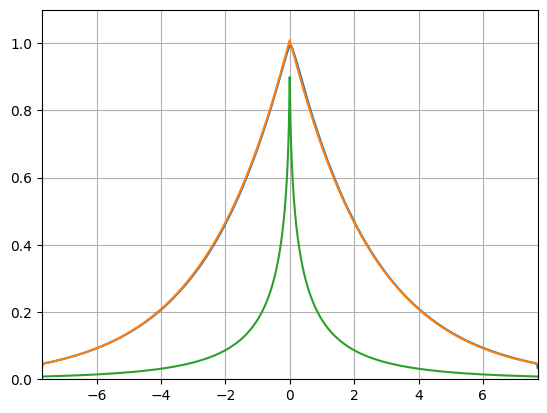

In [125]:
brightness_profile = IMG_normalized[1024, :]

# Sérsic Profile Model
def sersic_profile(r, I0, re, n, b_n):
    return I0 * np.exp(-b_n * abs(r / re)**(1/n))

# Example function to estimate b_n
def b_n(n):
    return 2*n - 1/3 + (4 / (405 * n))

b_n_test = b_n(2)
brightness_profile_test = sersic_profile(x_kpc_IMG_rel, 1, 4.5, 2, b_n_test)

# Initial guess for parameters [I0, re, n]
initial_guess = [1, 4.5, 1]

# Fit the model
popt, pcov = curve_fit(lambda r, I0, re, n: sersic_profile(r, I0, re, n, b_n(n)), x_kpc_IMG_rel, brightness_profile, p0=initial_guess)
I0_opt, re_opt, n_opt = popt

b_n_opt = b_n(n_opt)
brightness_profile_opt = sersic_profile(x_kpc_IMG_rel, I0_opt, re_opt, n_opt, b_n_opt)

plt.plot(x_kpc_IMG_rel, brightness_profile)
plt.plot(x_kpc_IMG_rel, brightness_profile_opt)
plt.plot(x_kpc_IMG_rel, brightness_profile_test)
plt.xlim(x_kpc_IMG_rel.min(), x_kpc_IMG_rel.max())
plt.ylim(0, 1.1)
plt.grid()
plt.show()

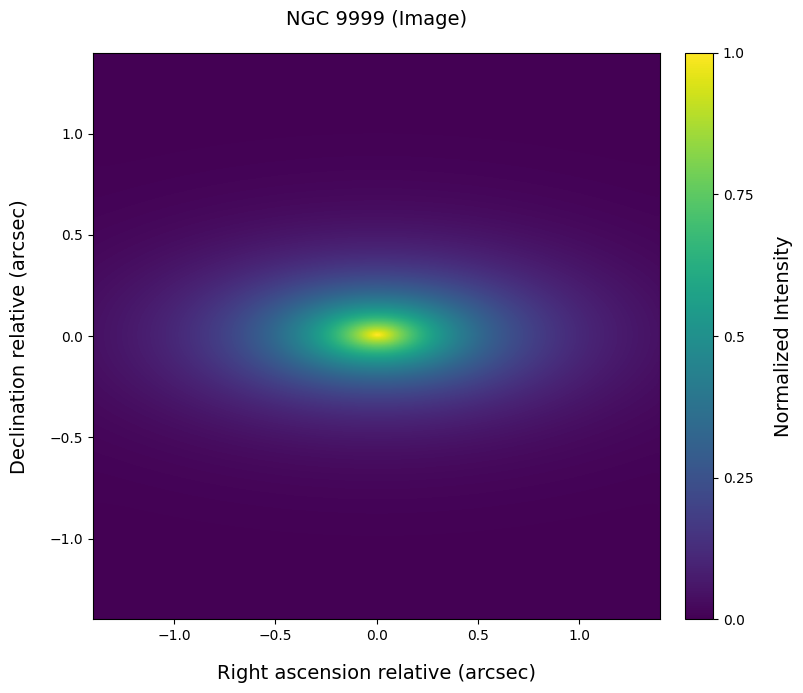

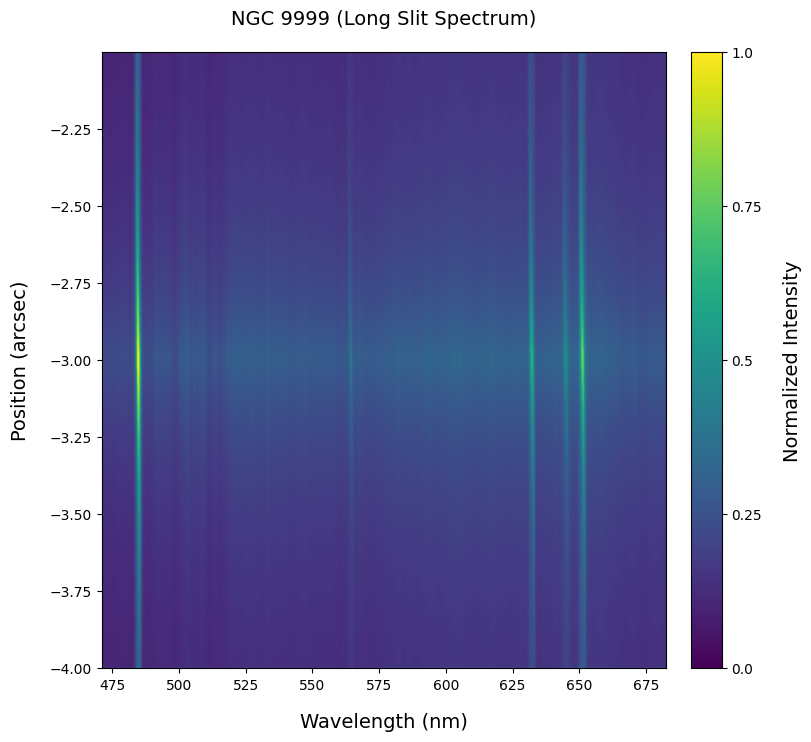

In [126]:
import matplotlib.colors as colors

plt.figure(figsize=(8, 8))
ax = plt.subplot(111)

# Compute normalization for IMG data
data_min_IMG = IMG.min()
data_max_IMG = IMG.max()
norm_IMG = colors.Normalize(vmin=data_min_IMG, vmax=data_max_IMG)

# Show image with normalization
IMGimage = ax.imshow(IMG, cmap='viridis', origin='lower', interpolation='nearest', 
                     extent=[x_ARCSEC_IMG_rel.value.min(), x_ARCSEC_IMG_rel.value.max(), 
                             y_ARCSEC_IMG_rel.value.min(), y_ARCSEC_IMG_rel.value.max()],
                     norm=norm_IMG)

num_ticks = 5
tick_values_IMG = np.linspace(data_min_IMG, data_max_IMG, num_ticks)

cbar_IMG = plt.colorbar(IMGimage, ax=ax, orientation='vertical', fraction=0.0457, pad=0.04)
cbar_IMG.set_ticks(tick_values_IMG)
# Map the tick labels from data range to [0,1]
tick_labels_IMG = np.linspace(0, 1, num_ticks)
cbar_IMG.set_ticklabels(np.round(tick_labels_IMG, 2))
cbar_IMG.set_label('Normalized Intensity', fontsize=14, labelpad=15)
cbar_IMG.ax.tick_params(labelsize=10)

ax.set_xlabel('Right ascension relative (arcsec)', fontsize=14, labelpad=15)
ax.set_ylabel('Declination relative (arcsec)', fontsize=14, labelpad=15)
plt.title('NGC 9999 (Image)', fontsize=14, pad=20)
plt.show()

# LSS der Galaxie mit (relativen) physikalischen Achsen darstellen
plt.figure(figsize=(8, 8))
ax = plt.subplot(111)

# Compute normalization for LSS data
data_min_LSS = LSS.min()
data_max_LSS = LSS.max()
norm_LSS = colors.Normalize(vmin=data_min_LSS, vmax=data_max_LSS)

LSSimage = ax.imshow(LSS, cmap='viridis', origin='lower', norm=norm_LSS, interpolation='nearest', 
                     extent=[x_NM_LSS.value.min(), x_NM_LSS.value.max(), 
                             y_ARCSEC_LSS.value.min(), y_ARCSEC_LSS.value.max()])
ax.set_aspect('auto')

tick_values_LSS = np.linspace(data_min_LSS, data_max_LSS, num_ticks)

cbar_LSS = plt.colorbar(LSSimage, ax=ax, orientation='vertical', fraction=0.05, pad=0.04)
cbar_LSS.set_ticks(tick_values_LSS)
tick_labels_LSS = np.linspace(0, 1, num_ticks)
cbar_LSS.set_ticklabels(np.round(tick_labels_LSS, 2))
cbar_LSS.set_label('Normalized Intensity', fontsize=14, labelpad=15)
cbar_LSS.ax.tick_params(labelsize=10)

ax.set_xlabel('Wavelength (nm)', fontsize=14, labelpad=15)
ax.set_ylabel('Position (arcsec)', fontsize=14, labelpad=15)
plt.title('NGC 9999 (Long Slit Spectrum)' , fontsize=14, pad=20)
plt.show()

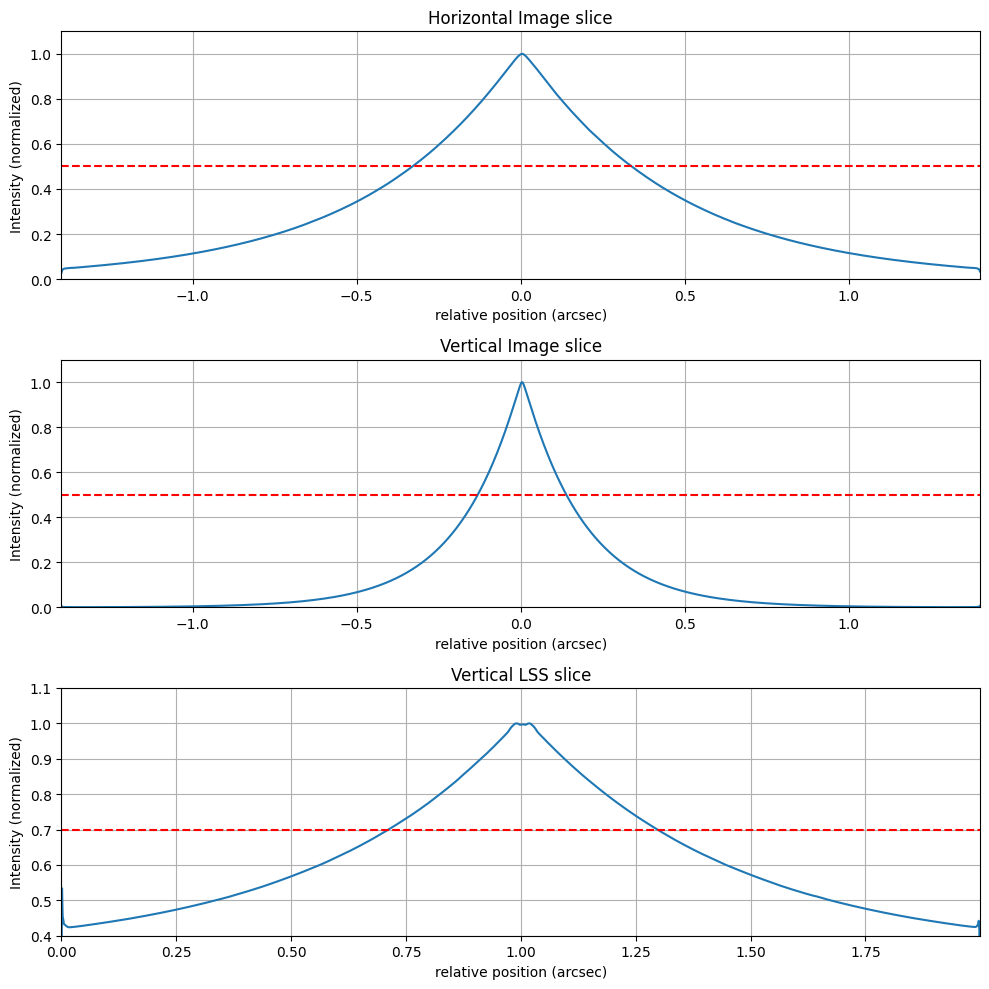

In [127]:
#X and Y cut IMG and Y cut LSS

y_IMG_profile = IMG[1024, :]
x_IMG_profile = IMG[:, 1024]

y_LSS_profile = np.mean(LSS, axis=1)

fix, axis = plt.subplots(3, 1, figsize=(10, 10))
axis[0].plot(y_ARCSEC_IMG_rel, y_IMG_profile / max(y_IMG_profile))
axis[0].set_xlim(np.min(y_ARCSEC_IMG_rel.value), np.max(y_ARCSEC_IMG_rel.value))
axis[0].set_ylim(0, 1.1)
axis[0].axhline(y=0.5, color='r', linestyle='--')
axis[0].set_xlabel('relative position (arcsec)')
axis[0].set_ylabel('Intensity (normalized)')
axis[0].set_title('Horizontal Image slice')
axis[0].grid(True)

axis[1].plot(x_ARCSEC_IMG_rel, x_IMG_profile / max(x_IMG_profile))
axis[1].set_xlim(np.min(x_ARCSEC_IMG_rel.value), np.max(x_ARCSEC_IMG_rel.value))
axis[1].set_ylim(0, 1.1)
axis[1].axhline(y=0.5, color='r', linestyle='--')
axis[1].set_xlabel('relative position (arcsec)')
axis[1].set_ylabel('Intensity (normalized)')
axis[1].set_title('Vertical Image slice')
axis[1].grid(True)

axis[2].plot(y_ARCSEC_LSS_rel, y_LSS_profile / max(y_LSS_profile))
axis[2].set_xlim(np.min(y_ARCSEC_LSS_rel.value), np.max(y_ARCSEC_LSS_rel.value))
axis[2].set_ylim(0.4, 1.1)
axis[2].axhline(y=0.7, color='r', linestyle='--')
axis[2].set_xlabel('relative position (arcsec)')
axis[2].set_ylabel('Intensity (normalized)')
axis[2].set_title('Vertical LSS slice')
axis[2].grid(True)

plt.tight_layout()
plt.show()

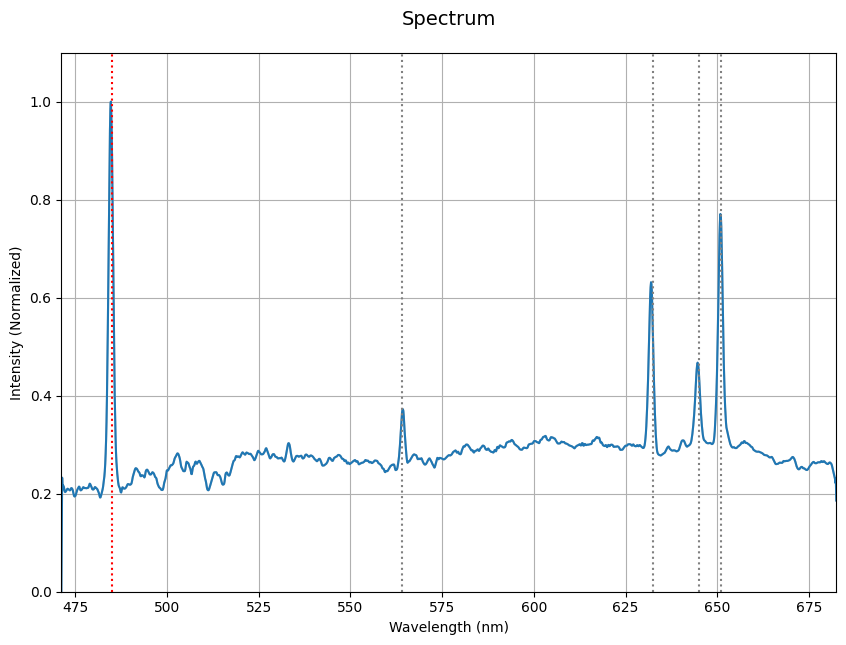

In [128]:
#LSS x cut
line1 = 484.9
line2 = 632.4
line3 = 651
line4 = 564
line5 = 645


fig, ax = plt.subplots(1, 1, figsize=(10, 7))
spect = np.divide(LSS[732, :], LSS[732, :].max())
ax.plot(x_NM_LSS, spect, color='#C4C4C4')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Intensity (Normalized)')
ax.set_title('Spectrum', fontsize=14, pad=20)
ax.set_xlim([x_NM_LSS.value.min(), x_NM_LSS.value.max()])
ax.set_ylim([0, 1.1])

ax.plot(x_NM_LSS.value, LSS[732, :]/max(LSS[732, :]))
ax.vlines(line1, 0, 1.1, linestyles=':', colors='r', label='?')
ax.vlines(line2, 0, 1.1, linestyles=':', colors='gray', label='?')
ax.vlines(line3, 0, 1.1, linestyles=':', colors='grey', label='?')
ax.vlines(line4, 0, 1.1, linestyles=':', colors='gray', label='?')
ax.vlines(line5, 0, 1.1, linestyles=':', colors='grey', label='?')

ax.grid()
plt.show()

Corrected Wavelengths: 
 1:	372.7692nm 
 2:	486.0769nm 
 3:	500.6923nm 
 4:	433.8462nm 
 5:	496.1538nm


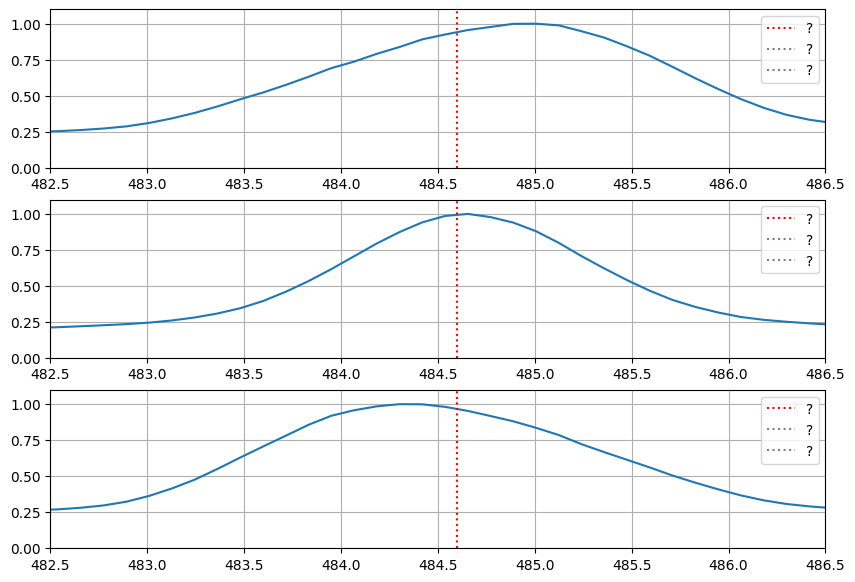

In [129]:
#Doppler Correction and Gauss-Fit

Z = 0.3


#z = fobs/femit - 1 => femit = fobs/(1+z)
def redshiftCorrection(wavelength):
    return(wavelength / (1+Z))


#Approx redshifted emmision-wavelengths in nm:
line1 = 484.6
line2 = 631.9
line3 = 650.9
line4 = 564
line5 = 645

fig, ax = plt.subplots(3, 1, figsize=(10, 7))
ax[0].plot(x_NM_LSS.value, LSS[100, :]/max(LSS[100, :]))
ax[0].vlines(line1, 0, 1.1, linestyles=':', colors='r', label='?')
ax[0].vlines(line2, 0, 1.1, linestyles=':', colors='gray', label='?')
ax[0].vlines(line3, 0, 1.1, linestyles=':', colors='grey', label='?')
#ax.set_xlim(min(x_NM_LSS.value), max(x_NM_LSS.value))
ax[0].set_xlim(482.5, 486.5)
ax[0].set_ylim(0, 1.1)
ax[0].grid()
ax[0].legend()

ax[1].plot(x_NM_LSS.value, LSS[732, :]/max(LSS[732, :]))
ax[1].vlines(line1, 0, 1.1, linestyles=':', colors='r', label='?')
ax[1].vlines(line2, 0, 1.1, linestyles=':', colors='gray', label='?')
ax[1].vlines(line3, 0, 1.1, linestyles=':', colors='grey', label='?')
#ax.set_xlim(min(x_NM_LSS.value), max(x_NM_LSS.value))
ax[1].set_xlim(482.5, 486.5)
ax[1].set_ylim(0, 1.1)
ax[1].grid()
ax[1].legend()

ax[2].plot(x_NM_LSS.value, LSS[1400, :]/max(LSS[1400, :]))
ax[2].vlines(line1, 0, 1.1, linestyles=':', colors='r', label='?')
ax[2].vlines(line2, 0, 1.1, linestyles=':', colors='gray', label='?')
ax[2].vlines(line3, 0, 1.1, linestyles=':', colors='grey', label='?')
#ax.set_xlim(min(x_NM_LSS.value), max(x_NM_LSS.value))
ax[2].set_xlim(482.5, 486.5)
ax[2].set_ylim(0, 1.1)
ax[2].grid()
ax[2].legend()


corrLine1 = redshiftCorrection(line1)
corrLine2 = redshiftCorrection(line2)
corrLine3 = redshiftCorrection(line3)
corrLine4 = redshiftCorrection(line4)
corrLine5 = redshiftCorrection(line5)

print(f'Corrected Wavelengths: \n 1:\t{corrLine1:.4f}nm \n 2:\t{corrLine2:.4f}nm \n 3:\t{corrLine3:.4f}nm \n 4:\t{corrLine4:.4f}nm \n 5:\t{corrLine5:.4f}nm')


Closes guesses with NIST-ASD so far:

OII	373.0770 nm 
Fe II 	485.6152 nm 
Fe II 	500.1557 nm 



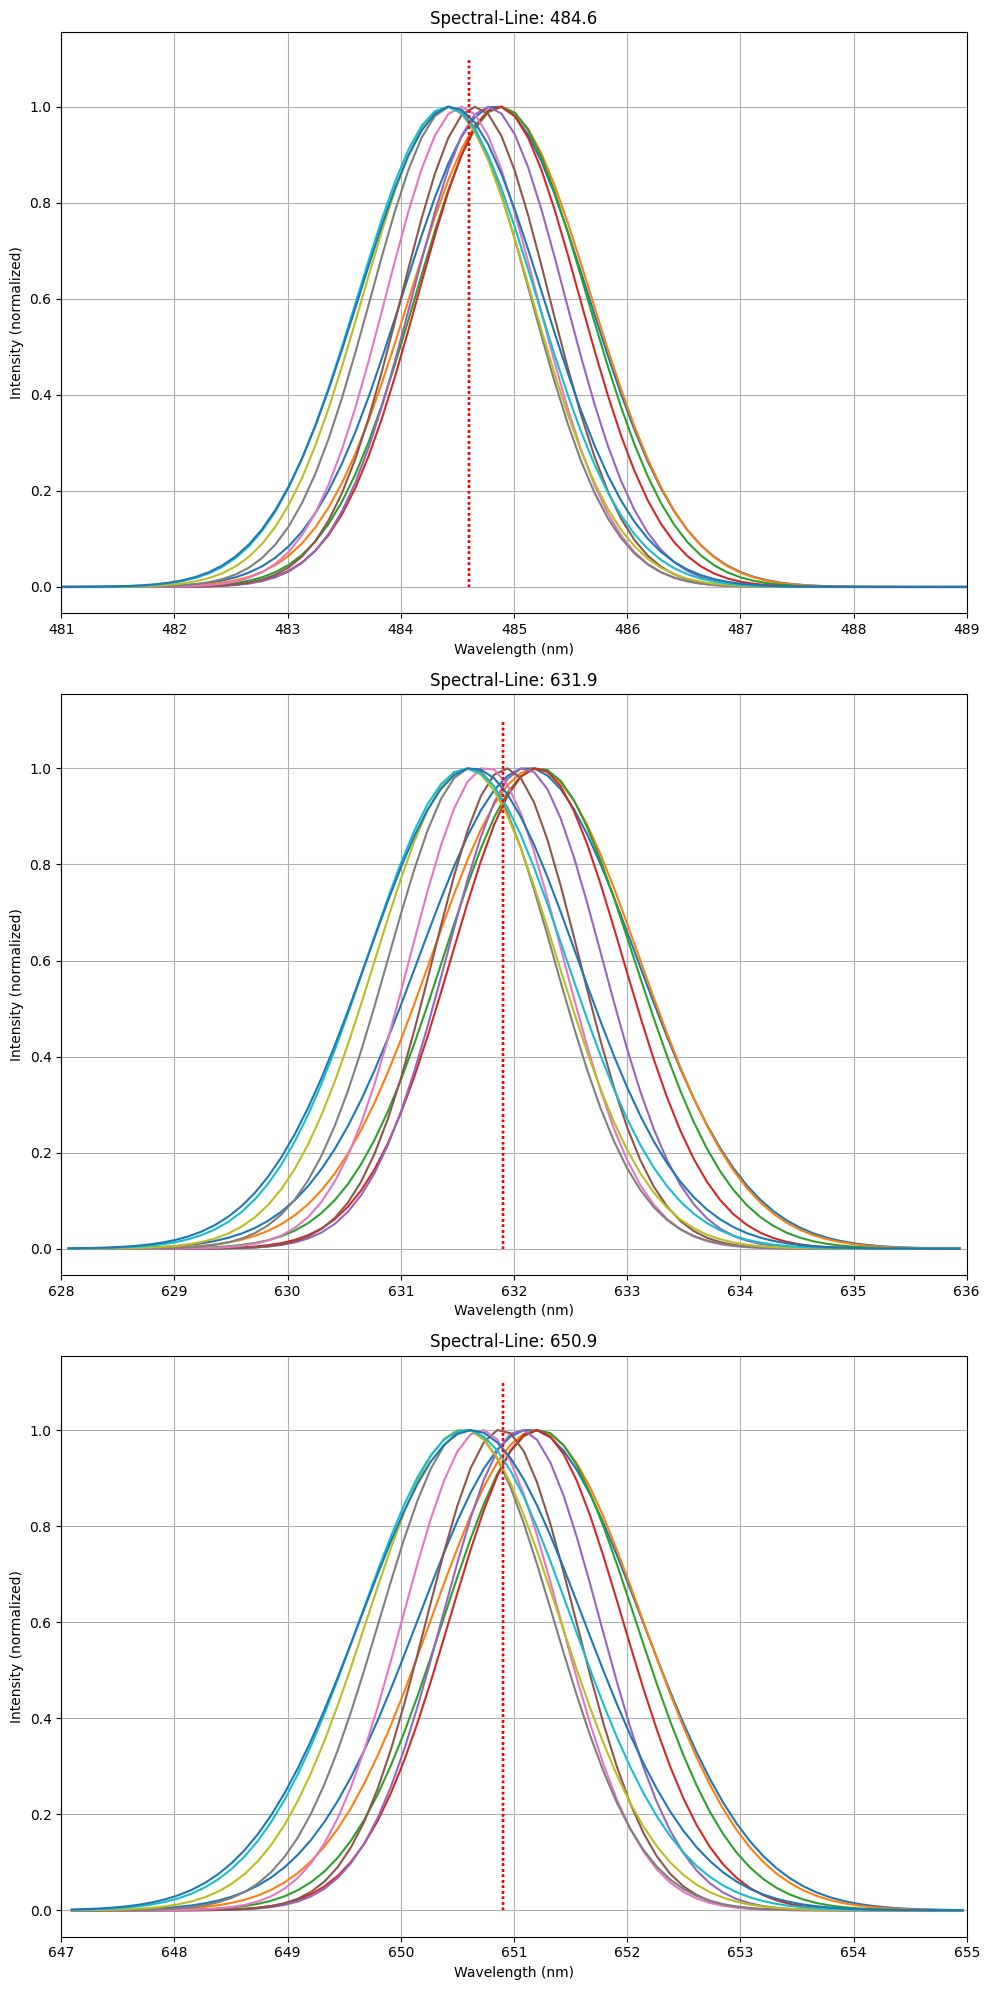

In [130]:
#Gauss-Fits
def Gauss(x, amp, mean, std): 
    return amp*np.exp(-(x-mean)**2/(2*std**2)) 

#Map Axis
def fit(slice, minWavelength, maxWavelength, ax=None):
    cut = LSS[slice, :]/max(LSS[slice, :])
    filter = np.where(np.logical_and(x_NM_LSS.value >= minWavelength, x_NM_LSS.value <= maxWavelength))
    newAxX = x_NM_LSS[filter].value
    cutFiltered = cut[filter]
    cutFiltered = cutFiltered-cutFiltered.min()
    cutFiltered = cutFiltered/cutFiltered.max()
    popt, pcov = curve_fit(Gauss, newAxX, cutFiltered, p0=[np.max(cutFiltered), np.mean(newAxX), np.std(cutFiltered)])
   
    ym = Gauss(newAxX, popt[0], popt[1], popt[2])

    ym = np.divide(ym, np.max(ym))

    ax.plot(newAxX, ym)
    #ax.plot(newAxX, cutFiltered)
    ax.set_xlim(minWavelength, maxWavelength)
    ax.set_xlabel('Wavelength (nm)')
    ax.set_ylabel('Intensity (normalized)')

    return popt[1]

#Plotting
posSlit = []
mu1 = []
mu2 = []
mu3 = []

fig, ax = plt.subplots(3, 1, figsize=(10, 20))

for i in range(1, 12):
    posSlit.append(122*i)

    mu1.append(fit(posSlit[i-1], 481, 489, ax[0]))
    mu2.append(fit(posSlit[i-1], 628, 636, ax[1]))
    mu3.append(fit(posSlit[i-1], 647, 655, ax[2]))
    ax[0].vlines(line1, 0, 1.1, linestyles=':', colors='r')
    ax[0].grid()
    ax[0].set_title(f'Spectral-Line: {line1}')
    
    ax[1].vlines(line2, 0, 1.1, linestyles=':', colors='r')
    ax[1].grid()
    ax[1].set_title(f'Spectral-Line: {line2}')

    ax[2].vlines(line3, 0, 1.1, linestyles=':', colors='r')
    ax[2].grid()
    ax[2].set_title(f'Spectral-Line: {line3}')


plt.tight_layout()
plt.show()



[ 119.91174583  150.28978678  154.43145973  139.29586295   79.22361841
    0.          -83.055599   -147.01118054 -168.44226384 -169.43708011
 -145.39321409] [  99.82230882  133.86391651  148.79969127  142.11912512   82.94069034
    0.          -89.4980482  -160.39373974 -182.66626516 -180.96184412
 -154.93920128] [ 128.57020074  159.05962112  170.21815498  155.57517892   87.68213124
    0.          -87.83948325 -153.9838997  -167.75986526 -157.41284526
 -130.29584647]


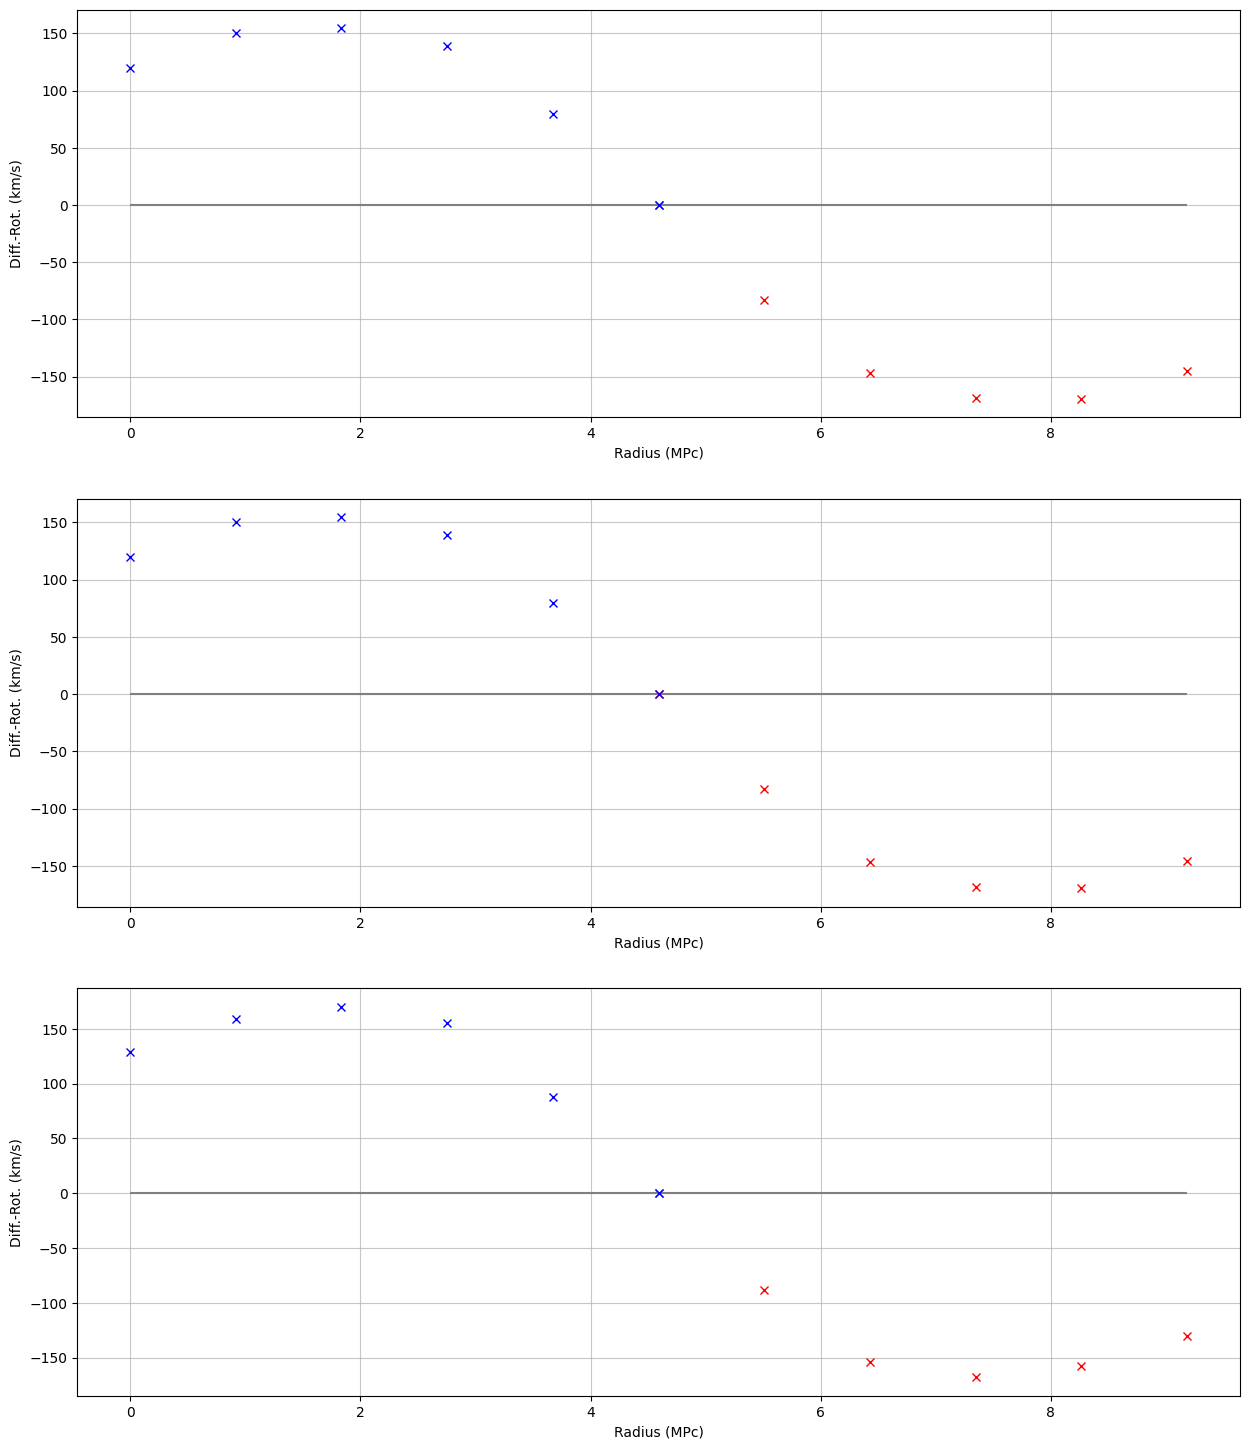

In [ ]:
#Rot.-Curve (Samplinmg of 15 seems okay)
sliceSize = 15


fig, ax = plt.subplots(3, 1, figsize=(15, 18))
      
res = len(y_ARCSEC_LSS)//sliceSize

diffPos = np.empty_like(posSlit)
diffMu = np.empty_like(mu1)
ref1 = mu1[5]
ref2 = mu2[5]
ref3 = mu3[5]

def plotVel(ax, radius, vel):
    
    maxX = np.max(radius)
    minX = np.min(radius)

    x = np.linspace(minX, maxX, len(posSlit))

    ax.hlines(0, minX, maxX, color='gray', linestyle='-')
    
    r = np.ma.masked_where(vel > 0, vel)
    b = np.ma.masked_where(vel < 0, vel)

    ax.plot(x, r, c='r', marker='x', linestyle='')
    ax.plot(x, b, c='b', marker='x', linestyle='')
    ax.set_xlabel('Radius (MPc)')
    ax.set_ylabel('Diff.-Rot. (km/s)')
    ax.grid(alpha=0.7, linestyle='-')


def calcDiffArr(diffArr, mu, ref):
    for m in range(len(mu)):
        diffArr[m-1] = mu[m-1]-ref


def calcVel(delLamda, lamdaRef):
    return np.divide(delLamda, lamdaRef) * c.value


def radVelInclined(velObs, a, b):
    alpha = np.arcsin(b / a)
    return velObs / np.cos(alpha)


stepArcSec = headerLSS['CDELT2'] * u.arcsec
def calcRadiusAxis():
    calcDiffArr(diffPos, posSlit, diffPos[0])
    axRAD = np.multiply(diffPos, stepArcSec).to(u.rad)
    kPc = np.multiply(d.value * 1000, np.tan(axRAD.value))
    return kPc


xAxkPc = calcRadiusAxis()

calcDiffArr(diffMu, mu1, ref1)
vel1 = radVelInclined(calcVel(diffMu, ref1), major_axis_kpc, minor_axis_kpc)
plotVel(ax[0], xAxkPc, vel1)

calcDiffArr(diffMu, mu2, ref2)
vel2 = radVelInclined(calcVel(diffMu, ref2), major_axis_kpc, minor_axis_kpc)
plotVel(ax[1], xAxkPc, vel1)

calcDiffArr(diffMu, mu3, ref3)
vel3 = radVelInclined(calcVel(diffMu, ref3), major_axis_kpc, minor_axis_kpc)
plotVel(ax[2], xAxkPc, vel3)

